In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [465]:
df = pd.read_csv('../world-data-2023.csv')



Целевая переменная - 'Official language'

Переменная для анализа - 'Physicians per thousand'

In [466]:
df = df.dropna()
df = df.reset_index(drop=True)
for i in df['Official language']:   
    if len(df[df['Official language'] == i]) <= 2:
        df = df.loc[df['Official language'] != i]
y = df.groupby(['Official language'])
df

,Country,Density\r\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,...,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
2,Algeria,18,DZ,17.4,2381741,317000,24.28,...,41.2,37.2,66.1,11.70,31510100,28.033886,1.659626
3,Angola,26,AO,47.5,1246700,117000,40.73,...,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887
4,Antigua and Barbuda,223,AG,20.5,443,0,15.33,...,0.0,16.5,43.0,0.00,23800,17.060816,-61.796428
5,Argentina,17,AR,54.3,2780400,105000,17.02,...,61.3,10.1,106.3,9.79,41339571,-38.416097,-63.616672
7,Austria,109,AT,32.4,83871,21000,9.70,...,60.7,25.4,51.4,4.67,5194416,47.516231,14.550072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Uruguay,20,UY,82.6,176215,22000,13.86,...,64.0,20.1,41.8,8.73,3303394,-32.522779,-55.765835
153,Vanuatu,25,VU,15.3,12189,0,29.60,...,69.9,17.8,8.5,4.39,76152,-15.376706,166.959158
154,Venezuela,32,VE,24.5,912050,343000,17.88,...,59.7,0.0,73.3,8.80,25162368,6.423750,-66.589730
156,Yemen,56,YE,44.6,527968,40000,30.45,...,38.0,0.0,26.6,12.91,10869523,15.552727,48.516388


In [467]:
df['Physicians per thousand'].describe()

count    94.000000
mean      1.477660
std       1.629855
min       0.010000
25%       0.182500
50%       0.785000
75%       2.487500
max       8.420000
Name: Physicians per thousand, dtype: float64

In [468]:
describe = y['Physicians per thousand'].describe()
describe

,count,mean,std,min,25%,50%,75%,max
Official language,,,,,,,,
Arabic,16.0,1.340000,0.920681,0.02,0.6100,1.260,2.1550,2.61
English,21.0,1.136190,1.260105,0.03,0.1900,0.640,1.4100,4.17
French,22.0,0.689545,1.082046,0.04,0.0800,0.175,0.5775,3.27
German,3.0,4.573333,0.517333,4.25,4.2750,4.300,4.7350,5.17
Portuguese,7.0,1.311429,1.824677,0.08,0.1700,0.720,1.4600,5.12
Russian,4.0,3.582500,1.387549,1.88,2.9075,3.630,4.3050,5.19
Spanish,17.0,2.395882,2.044349,0.31,1.2700,1.920,2.8900,8.42
Swahili,4.0,0.117500,0.073655,0.01,0.1000,0.145,0.1625,0.17


In [469]:
mean = y['Physicians per thousand'].mean()
mean

Official language
Arabic        1.340000
English       1.136190
French        0.689545
German        4.573333
Portuguese    1.311429
Russian       3.582500
Spanish       2.395882
Swahili       0.117500
Name: Physicians per thousand, dtype: float64

In [470]:
mode = y['Physicians per thousand'].apply(lambda x : x.mode())
mode

Official language    
Arabic             0     0.02
                   1     0.19
                   2     0.26
                   3     0.31
                   4     0.71
                         ... 
Spanish            16    8.42
Swahili            0     0.01
                   1     0.13
                   2     0.16
                   3     0.17
Name: Physicians per thousand, Length: 73, dtype: float64

In [471]:
min = y['Physicians per thousand'].min()
min

Official language
Arabic        0.02
English       0.03
French        0.04
German        4.25
Portuguese    0.08
Russian       1.88
Spanish       0.31
Swahili       0.01
Name: Physicians per thousand, dtype: float64

In [472]:
max = y['Physicians per thousand'].max()
max

Official language
Arabic        2.61
English       4.17
French        3.27
German        5.17
Portuguese    5.12
Russian       5.19
Spanish       8.42
Swahili       0.17
Name: Physicians per thousand, dtype: float64

In [473]:
std = y['Physicians per thousand'].std()
std

Official language
Arabic        0.920681
English       1.260105
French        1.082046
German        0.517333
Portuguese    1.824677
Russian       1.387549
Spanish       2.044349
Swahili       0.073655
Name: Physicians per thousand, dtype: float64

In [474]:
q1 = y['Physicians per thousand'].quantile(0.25)
q1

Official language
Arabic        0.6100
English       0.1900
French        0.0800
German        4.2750
Portuguese    0.1700
Russian       2.9075
Spanish       1.2700
Swahili       0.1000
Name: Physicians per thousand, dtype: float64

In [475]:
q2 = y['Physicians per thousand'].quantile(0.5)
q2

Official language
Arabic        1.260
English       0.640
French        0.175
German        4.300
Portuguese    0.720
Russian       3.630
Spanish       1.920
Swahili       0.145
Name: Physicians per thousand, dtype: float64

In [476]:
q3 = y['Physicians per thousand'].quantile(0.75)
q3

Official language
Arabic        2.1550
English       1.4100
French        0.5775
German        4.7350
Portuguese    1.4600
Russian       4.3050
Spanish       2.8900
Swahili       0.1625
Name: Physicians per thousand, dtype: float64

In [477]:
iqr = q3 - q1
iqr

Official language
Arabic        1.5450
English       1.2200
French        0.4975
German        0.4600
Portuguese    1.2900
Russian       1.3975
Spanish       1.6200
Swahili       0.0625
Name: Physicians per thousand, dtype: float64

Вывод: 
       
       1. Максимальное количество врачей на тысячу человек находится в странах европейской языковой группы.
       2. Минимальное количество врачей на тысячу человек находится в странах арабской, африканской языковых групп, а также бывших колониальных владений, сохранивших язык метрополии.
       3. Наибольшее среднее отклонение также свойственно странам арабской языковой группы и колониальным/метропольным языкам. Это может говорить о большой разнице бютжетов стран внутри одной языковой группы


Основы визуализации

Text(0, 0.5, 'Частота')

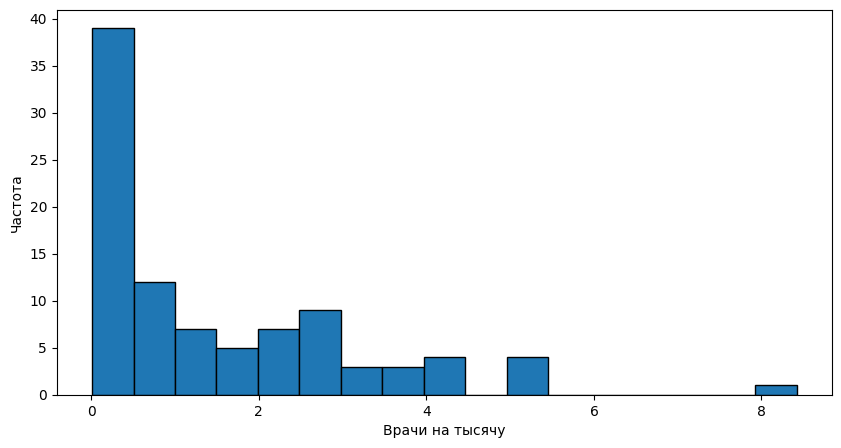

In [478]:
plt.figure(figsize=(10,5))
plt.hist(df['Physicians per thousand'],bins = 17, edgecolor='black')
plt.xlabel('Врачи на тысячу')
plt.ylabel('Частота')

Text(0.5, 0, 'Врачи на тысячу')

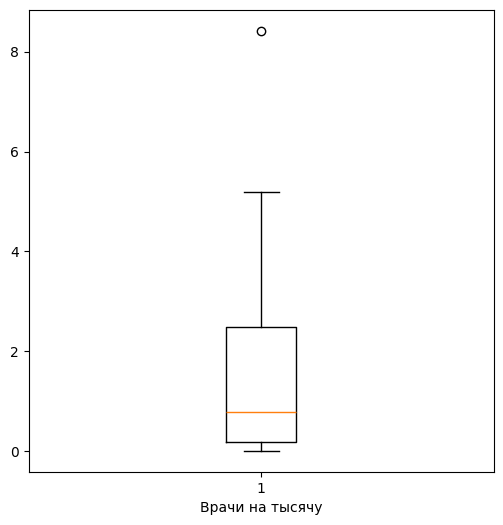

In [479]:
plt.figure(figsize=(6,6))
plt.boxplot(df['Physicians per thousand'])
plt.xlabel('Врачи на тысячу')

На обоих графиках виден выброс в чуть выше 8

In [480]:
df = df[df['Physicians per thousand'] < 8]

Убрали выброс

Text(0, 0.5, 'Частота')

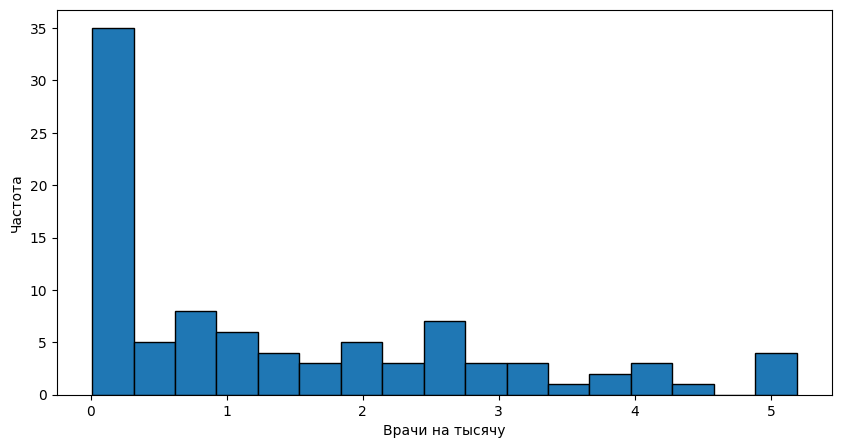

In [481]:
plt.figure(figsize=(10,5))
plt.hist(df['Physicians per thousand'],bins = 17, edgecolor='black')
plt.xlabel('Врачи на тысячу')
plt.ylabel('Частота')

Text(0.5, 0, 'Врачи на тысячу')

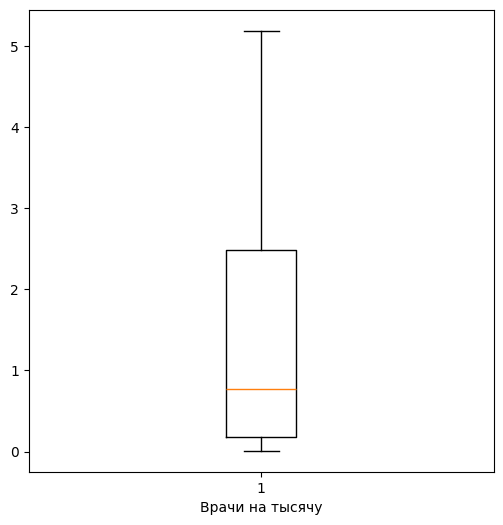

In [482]:
plt.figure(figsize=(6,6))
plt.boxplot(df['Physicians per thousand'])
plt.xlabel('Врачи на тысячу')

<Axes: xlabel='Physicians per thousand', ylabel='Official language'>

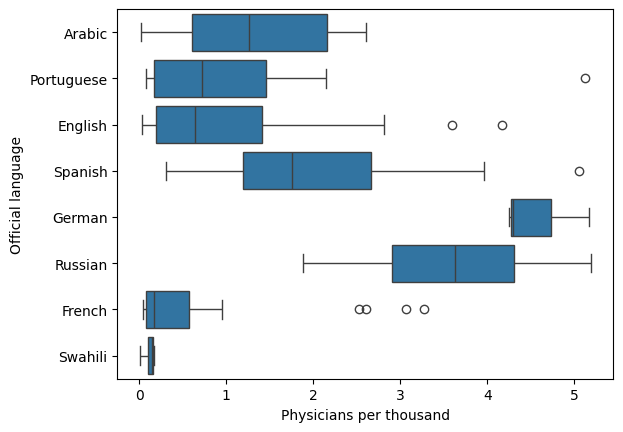

In [483]:
sns.boxplot(x = df['Physicians per thousand'], y = df['Official language'])

Для группированной по языкам статистики также присутствуют выбросы


In [484]:
df = df.drop(df[(df['Official language'] == 'Portuguese') & (df['Physicians per thousand'] > 3)].index)
df = df.drop(df[(df['Official language'] == 'English') & (df['Physicians per thousand'] > 3)].index)
df = df.drop(df[(df['Official language'] == 'Spanish') & (df['Physicians per thousand'] > 4.2)].index)
df = df.drop(df[(df['Official language'] == 'French') & (df['Physicians per thousand'] > 2)].index)

<Axes: xlabel='Physicians per thousand', ylabel='Official language'>

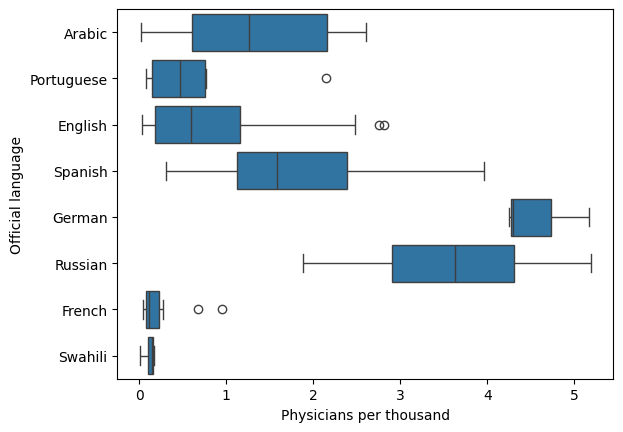

In [485]:
sns.boxplot(x = df['Physicians per thousand'], y = df['Official language'])

<Axes: xlabel='Physicians per thousand', ylabel='Official language'>

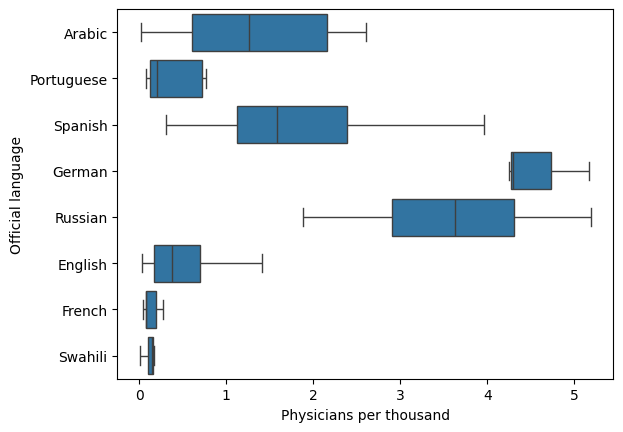

In [486]:
df = df.drop(df[(df['Official language'] == 'Portuguese') & (df['Physicians per thousand'] > 2)].index)
df = df.drop(df[(df['Official language'] == 'English') & (df['Physicians per thousand'] > 2.4)].index)
df = df.drop(df[(df['Official language'] == 'French') & (df['Physicians per thousand'] > 0.5)].index)
sns.boxplot(x = df['Physicians per thousand'], y = df['Official language'])

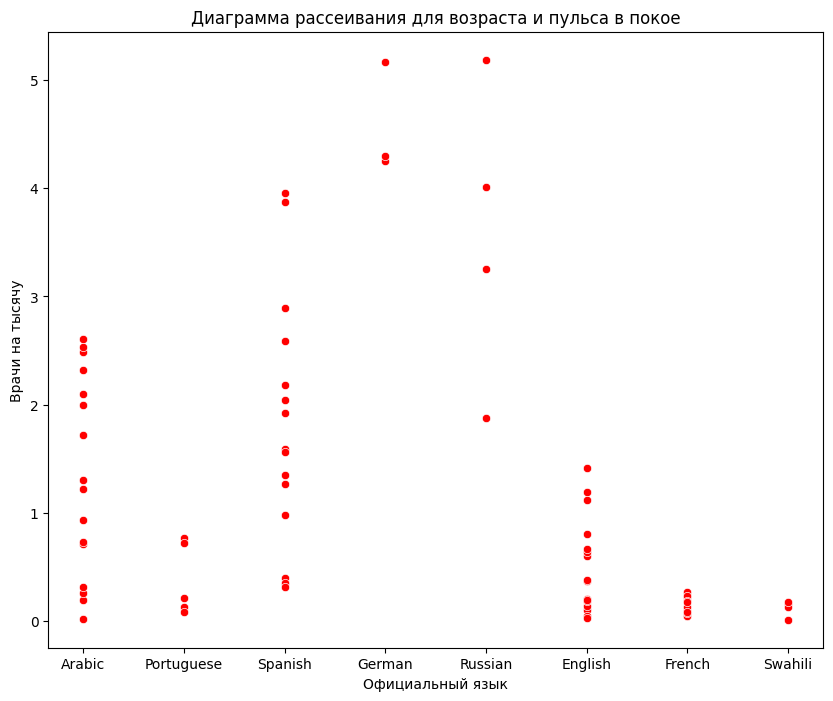

In [487]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Official language', y='Physicians per thousand', data=df, color='red')
plt.title('Диаграмма рассеивания для возраста и пульса в покое')
plt.xlabel('Официальный язык')
plt.ylabel('Врачи на тысячу')
plt.show()

В целом, значения совпадают с групппированным boxplot

<Axes: >

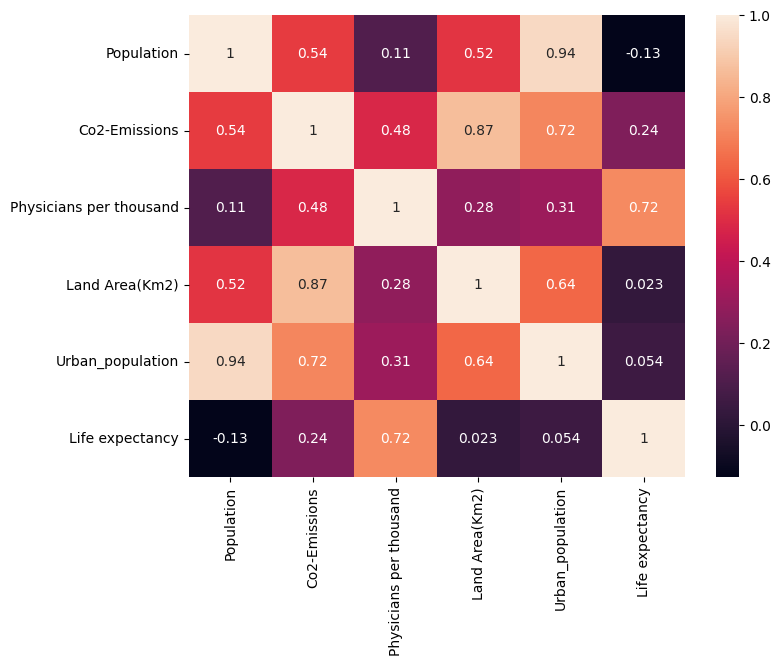

In [488]:
matrix_for_correlation = df[['Population','Co2-Emissions','Physicians per thousand','Land Area(Km2)','Urban_population','Life expectancy']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap((matrix_for_correlation), annot=True)

Выводы:

        1. Продолжительность жизни зависит от количества врачей на тысячу населения
        2. Городское население зависит от населения страны
        3. В приведённых данных очень слабая зависимость между выбросами Co2 и средней продолжительностью жизни
        4. Выбросы Co2 зависят от площади страны
        5. Все остальные зависимости очень слабы